# AMAZON MUSIC REVIEWS

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.text import *

In [5]:
path = Path('home/storage')
folder = 'amazon_music_reviews'
file = 'Musical_instrument_reviews2.csv'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [6]:
path = Config.data_path()/'amazon_music_reviews'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/storage/amazon_music_reviews')

In [7]:
df = pd.read_csv(path/'Musical_instruments_reviews2.csv')
df.head()

,overall,reviewText,Unnamed: 2,summary,unixReviewTime,reviewTime,reviewerID,Unnamed: 7
0,5,"Not much to write about here, but it does exac...",NaN,good,1393545600,"02 28, 2014",A2IBPI20UZIR0U,0.0
1,5,The product does exactly as it should and is q...,NaN,Jake,1363392000,"03 16, 2013",A14VAT5EAX3D9S,NaN
2,5,The primary job of this device is to block the...,NaN,It Does The Job Well,1377648000,"08 28, 2013",A195EZSQDW3E21,NaN
3,5,Nice windscreen protects my MXL mic and preven...,NaN,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",A2C00NNG1ZQQG2,NaN
4,5,This pop filter is great. It looks and perform...,NaN,No more pops when I record my vocals.,1392940800,"02 21, 2014",A94QU4C90B1AX,NaN


In [8]:
df['reviewText'][4]

"This pop filter is great. It looks and performs like a studio filter. If you're recording vocals this will eliminate the pops that gets recorded when you sing."

In [9]:
data_lm = TextDataBunch.from_csv(path, 'Musical_instruments_reviews2.csv')

In [10]:
data_lm.save()

In [11]:
data = load_data(path)

In [12]:
example_text = df.iloc[0][1]; example_text

"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,"

In [13]:
tokenizer = Tokenizer()
tok = SpacyTokenizer('en')
' '.join(tokenizer.process_text(example_text, tok))

"xxmaj not much to write about here , but it does exactly what it 's supposed to . filters out the pop sounds . now my recordings are much more crisp . it is one of the lowest prices pop filters on amazon so might as well buy it , they honestly work the same despite their pricing ,"

In [14]:
df = pd.read_csv(path/'Musical_instruments_reviews2.csv', header=None)
texts = df[1].values
tokenizer = Tokenizer()
tokens = tokenizer.process_all(texts)
' '.join(tokens[10261])

'xxmaj these strings are really quite good , but i would n\'t call them perfect . xxmaj the unwound strings are not quite as bright as i am accustomed to , but they still ring nicely . xxmaj this is the only complaint i have about these strings . xxmaj if the unwound strings were a tiny bit brighter , these would be 5-star strings . xxmaj as it stands , i give them 4.5 stars ... not a big knock , actually . xxmaj the low - end on the wound strings is very nice and quite warm . i put these on a jumbo and it definitely accentuates the " jumbo " aspect of my acoustic . xxmaj the sound is very big , full , and nice . xxmaj definitely a recommended product!4.5 / 5 stars'

In [15]:
data = TextClasDataBunch.from_csv(path, 'Musical_instruments_reviews2.csv')
data.show_batch()

text,target
"xxbos i use this little guy in connection with my xxup daw and digital piano . i run the piano sounds through balanced cables into the line - in ports for recording , and i also run xxup vst xxunk on my xxup daw that i trigger via xxup usb xxup midi from the piano and use this device for digital / audio conversion . i listen through xxmaj xxunk",3
"xxbos i love this capo . xxmaj let me tell you about my capo journey where i 've used every brand while searching for this one . xxmaj first , i always owned the old xxmaj dunlop xxmaj toggle xxmaj action capo which is just old tech , you know , where it 's just a bundle of synthetic cotton fiber , the kind one used to use before 1980",5
"xxbos xxmaj what you need to know about this xxunk ) xxmaj this mic is very directional . xxmaj you must keep your mouth in the sweet spot at all times for best results . xxmaj pulling back an inch gets into tinny muddy territory , and an inch too close makes for a strong proximity effect . i found that a palm 's width from the tip of the",5
"xxbos i only just received these , but thought i 'd give my first impression . i purchased headphones because i figured it was a more pleasant way to listen to music at work than in - ear type . i chose this model because they were on sale , seemed to be a diamond in the rough , and reviews indicated it would be good for large xxunk wear",3
"xxbos i purchased this instrument brand new , on an impulse whim due to a xxunk - choice sale at a local music shop that i simply could not ignore . xxmaj it was brand new , unopened , in box . xxmaj they allowed me to examine it prior to purchase . xxmaj in that environment i thought it a nice instrument . xxmaj however , it can be",2


In [16]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.']

In [17]:
data.train_ds[0][0]

Text xxbos xxmaj these are my favorite strings to use on my xxmaj american xxmaj strat ! xxmaj they feel great , sound great , and are extremely cheap ! i would definately recommend these strings to any electric guitar user ... buy a pack and try them out ! xxmaj for less than $ 4 , you can see if they work well for you !

In [18]:
data.train_ds[0][0].data[:10]

array([  2,   5,  39,  31,  24, 553,  56,  16,  49,  23])

In [19]:
data = TextLMDataBunch.from_csv(path, 'Musical_instruments_reviews2.csv')
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.5)

In [20]:
data_clas = TextClasDataBunch.from_csv(path, 'Musical_instruments_reviews2.csv', vocab=data_lm.train_ds.vocab, bs=2)
#data_lm.train_ds.vocab

In [21]:
data_lm.save('data_lm_export.pkl')
data_clas.save('data_clas_export.pkl')

In [22]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.136683,3.906890,0.265911,00:33


In [23]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.793408,3.761133,0.282787,00:34


In [24]:
learn.predict("I wanted to ", n_words=20)

'I wanted to  make a good tone out of these adjustments for my son with his strumming mandolin and woods . But'

In [25]:
data_lm = load_data(path, 'data_lm_export.pkl')
data_clas = load_data(path, 'data_clas_export.pkl', bs=2)

In [26]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.save_encoder('ft_enc')
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (8208 items)
x: TextList
xxbos i bought this to use on my xxmaj fender p - bass . xxmaj it is not reliable for me , sometimes it works and sometimes it ca n't find the low note correctly . i 'm still using my xxmaj roland stomp box tuner . xxmaj glad this was inexpensive , it was not worth the hassle to return , i gave it away .,xxbos xxmaj with all the other great reviews noted here , i decided to buy this guitar . xxmaj had a xxmaj rogue 12 string a few years ago and sold it as i was not that impressed with it . xxmaj what a difference with the xxmaj epiphone . xxmaj the fit & finish speaks quality . xxmaj xxunk is very good with low action and good tone . xxmaj really is a great buy !,xxbos xxmaj this product is something every guitar owner needs . xxmaj it is well built , performs well and sells at a very reasonable price . xxmaj the sting cutter works well .,xxbos xxmaj noisy as any compressor but after using it i do n't wanna g

In [27]:
#data_clas.vocab.itos = data_lm.vocab.itos

In [28]:
#data_clas.vocab.stoi = data_lm.vocab.stoi


In [29]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)


In [30]:
#data_clas = TextClasDataBunch.from_csv(path, 'Musical_instruments_reviews2.csv',vocab=data_lm.vocab)
#data_clas.save('data_clas.pkl')

In [31]:
#data_clas = load_data(path, 'data_lm.pkl', bs=64)
#len(data_clas.vocab.itos) == len(data_lm.vocab.itos)

In [32]:
#config = awd_lstm_clas_config.copy()
#config['n_hid'] = 10608

In [33]:
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (8208 items)
x: TextList
xxbos i bought this to use on my xxmaj fender p - bass . xxmaj it is not reliable for me , sometimes it works and sometimes it ca n't find the low note correctly . i 'm still using my xxmaj roland stomp box tuner . xxmaj glad this was inexpensive , it was not worth the hassle to return , i gave it away .,xxbos xxmaj with all the other great reviews noted here , i decided to buy this guitar . xxmaj had a xxmaj rogue 12 string a few years ago and sold it as i was not that impressed with it . xxmaj what a difference with the xxmaj epiphone . xxmaj the fit & finish speaks quality . xxmaj xxunk is very good with low action and good tone . xxmaj really is a great buy !,xxbos xxmaj this product is something every guitar owner needs . xxmaj it is well built , performs well and sells at a very reasonable price . xxmaj the sting cutter works well .,xxbos xxmaj noisy as any compressor but after using it i do n't wanna g

In [34]:
data_clas.show_batch()

text,target
"xxbos xxup comparisons : i have compared , side by side , the following pedals : xxmaj fulltone mini deja vibe ( $ 200 ) , xxmaj dunlop xxmaj univibe ( discontinued stainless steel xxunk ) , xxmaj dunlop xxmaj roto - vibe ( $ 180 ) , xxmaj voodoo xxmaj labs xxmaj micro xxmaj vibe ( $ 150 ) , xxup bbe xxmaj soul xxmaj bender ( $ 129",5
"xxbos i play 1 - 2 nights a week in a midi - xxunk duo . xxmaj our xxup pa is a pair of xxmaj mackie 15 "" xxmaj thumps ( powered ) on the floor and xxmaj behringer 12 "" xxup xxunk ( powered ) on stands with a xxmaj mackie board . xxmaj we adjust the xxup pa to the room by adding or reducing the number of",4


In [35]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.837881,1.157871,0.679981,05:20


In [36]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.937447,1.167126,0.679493,05:23


In [37]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.093196,0.985290,0.679981,05:49


In [38]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


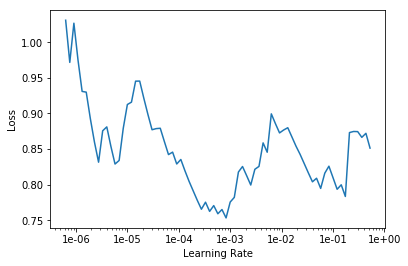

In [39]:
learn.recorder.plot()


In [40]:
learn.fit_one_cycle(1, slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,1.068640,0.942207,0.680955,05:49
